# Linear Algebra: Orthogonality and Projections

This notebook generates visualizations for orthogonality, projections, and QR decomposition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Vector Projection Visualization

a = [2 0]
b = [1 2]
proj_a(b) = [1. 0.]
residual = b - proj = [0. 2.]


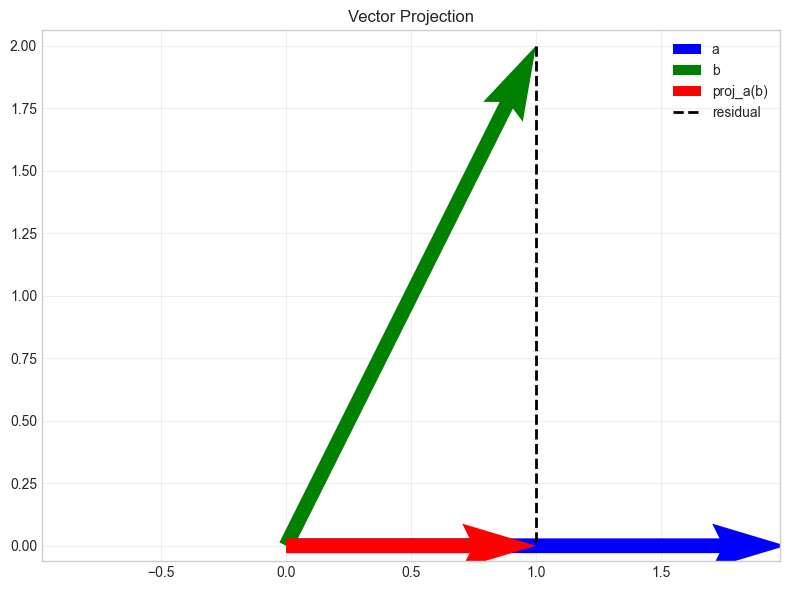

In [2]:
def vector_projection(b, a):
    """Project vector b onto vector a."""
    return (np.dot(a, b) / np.dot(a, a)) * a

a = np.array([2, 0])
b = np.array([1, 2])

proj = vector_projection(b, a)
residual = b - proj

print(f"a = {a}")
print(f"b = {b}")
print(f"proj_a(b) = {proj}")
print(f"residual = b - proj = {residual}")

# Visualize the projection
plt.figure(figsize=(8, 6))
origin = np.array([0, 0])

plt.quiver(*origin, *a, color='blue', scale=1, scale_units='xy', angles='xy', label='a', width=0.02)
plt.quiver(*origin, *b, color='green', scale=1, scale_units='xy', angles='xy', label='b', width=0.02)
plt.quiver(*origin, *proj, color='red', scale=1, scale_units='xy', angles='xy', label='proj_a(b)', width=0.02)
plt.plot([b[0], proj[0]], [b[1], proj[1]], 'k--', linewidth=2, label='residual')

plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.title('Vector Projection')
plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/vector-projection.png', dpi=150, bbox_inches='tight')
plt.show()

## Gram-Schmidt Process

In [3]:
def gram_schmidt(vectors):
    """Apply Gram-Schmidt orthonormalization."""
    vectors = np.array(vectors, dtype=float)
    n = len(vectors)
    orthonormal = []

    for i in range(n):
        v = vectors[i].copy()

        # Subtract projections onto previous vectors
        for u in orthonormal:
            v -= np.dot(v, u) * u

        # Normalize
        norm = np.linalg.norm(v)
        if norm > 1e-10:
            orthonormal.append(v / norm)

    return np.array(orthonormal)

# Apply Gram-Schmidt
v1 = np.array([1, 1, 0])
v2 = np.array([1, 0, 1])
v3 = np.array([0, 1, 1])

orthonormal = gram_schmidt([v1, v2, v3])

print("Original vectors:")
print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"v3 = {v3}")

print("\nOrthonormal vectors:")
for i, e in enumerate(orthonormal):
    print(f"e{i+1} = {e}")

# Verify orthonormality
print("\nVerification - Dot products (should be 0 for i != j):")
for i in range(3):
    for j in range(i, 3):
        dot = np.dot(orthonormal[i], orthonormal[j])
        print(f"  e{i+1} . e{j+1} = {dot:.6f}")

Original vectors:
v1 = [1 1 0]
v2 = [1 0 1]
v3 = [0 1 1]

Orthonormal vectors:
e1 = [0.70710678 0.70710678 0.        ]
e2 = [ 0.40824829 -0.40824829  0.81649658]
e3 = [-0.57735027  0.57735027  0.57735027]

Verification - Dot products (should be 0 for i != j):
  e1 . e1 = 1.000000
  e1 . e2 = 0.000000
  e1 . e3 = 0.000000
  e2 . e2 = 1.000000
  e2 . e3 = -0.000000
  e3 . e3 = 1.000000


## QR Decomposition

In [4]:
# Create a matrix
A = np.array([[1, 1, 0],
              [1, 0, 1],
              [0, 1, 1]], dtype=float)

# QR decomposition
Q, R = np.linalg.qr(A)

print(f"Matrix A:\n{A}\n")
print(f"Orthogonal matrix Q:\n{Q}\n")
print(f"Upper triangular R:\n{R}\n")

# Verify
print(f"Q @ R:\n{Q @ R}")
print(f"\nEquals A: {np.allclose(A, Q @ R)}")

# Verify Q is orthogonal
print(f"\nQ^T @ Q (should be identity):\n{np.round(Q.T @ Q, 10)}")

Matrix A:
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]

Orthogonal matrix Q:
[[-0.70710678  0.40824829 -0.57735027]
 [-0.70710678 -0.40824829  0.57735027]
 [-0.          0.81649658  0.57735027]]

Upper triangular R:
[[-1.41421356 -0.70710678 -0.70710678]
 [ 0.          1.22474487  0.40824829]
 [ 0.          0.          1.15470054]]

Q @ R:
[[ 1.00000000e+00  1.00000000e+00 -3.09999437e-16]
 [ 1.00000000e+00 -1.78835871e-16  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00]]

Equals A: True

Q^T @ Q (should be identity):
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


## Projection onto a Subspace

In [5]:
def projection_matrix(A):
    """Compute the projection matrix onto the column space of A."""
    return A @ np.linalg.inv(A.T @ A) @ A.T

# Project onto a plane in R^3
A = np.array([[1, 0],
              [0, 1],
              [1, 1]])

P = projection_matrix(A)

# Project a point onto the plane
b = np.array([1, 2, 3])
proj = P @ b

print(f"Projection matrix P:\n{P}\n")
print(f"Original vector b = {b}")
print(f"Projection onto plane: {proj}")
print(f"Residual: {b - proj}")

# Verify properties
print(f"\nProjection matrix properties:")
print(f"P^2 = P: {np.allclose(P @ P, P)}")
print(f"P^T = P: {np.allclose(P.T, P)}")

Projection matrix P:
[[ 0.66666667 -0.33333333  0.33333333]
 [-0.33333333  0.66666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]]

Original vector b = [1 2 3]
Projection onto plane: [1. 2. 3.]
Residual: [0. 0. 0.]

Projection matrix properties:
P^2 = P: True
P^T = P: True
